In [1]:
import numpy as np
import pandas as pd


from analysis_components.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, StatisticalSummaryInspectionStrategy
from analysis_components.missing_value_analysis import MissingValueAnalysis
from analysis_components.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analysis_components.bivariate_analysis import BivariateAnalyzer, NumericalAndNumericalAnalysis, CategoricalAndNumericalAnalysis

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [7]:
# Loading the data extracted using Data_ingestion or manually

file_path = 'S:\\LB_Projects\\Prediction-model\\artifacts\\dataset\\AmesHousing.csv'
dataframe = pd.read_csv(file_path)

### Step 1 : Basic Data Inspection

<b>Initialize the Data Inspector with a strategy for Data Types Inspection</b>

In [8]:


data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.data_inspection(dataframe)


 Data Types and Non-null Count:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-n

<b>Switch strategy to Summary Statistics Inspection </b>

In [9]:
data_inspector.set_strategy(StatisticalSummaryInspectionStrategy())
data_inspector.data_inspection(dataframe)


Summary Statistics (Numerical Features):
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026     

### Step 2: Missing Values Analysis

<b>Perform Missing Values Analysis</b>


 Missing Values Count by Column:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Visualizing Missing Values...


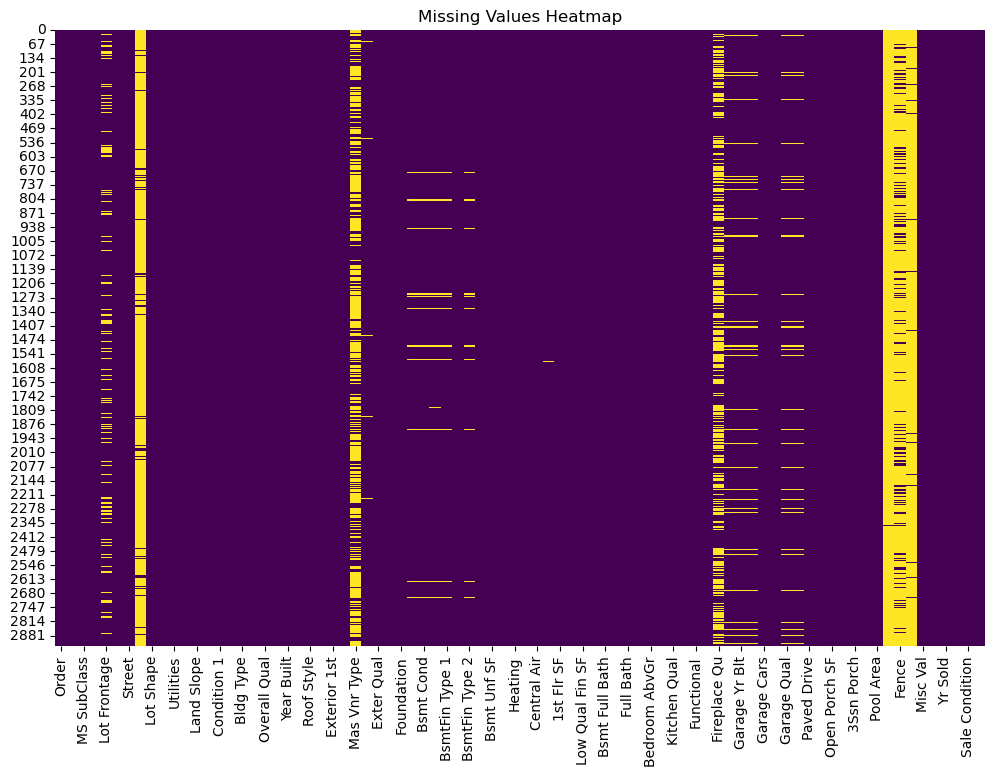

In [10]:
missingValueAnalysis = MissingValueAnalysis()
missingValueAnalysis.analyze(dataframe)

# Missing Values Heatmap Insights

#### **1. Colors Represent Missingness:**
- **Yellow**: Represents missing values. The more yellow you see in a column, the more missing data is present in that particular feature.
- **Purple (or dark color)**: Represents non-missing values. Columns that are mostly purple indicate that most of the data is present for that feature.

#### **2. Identifying Columns with Missing Data:**
- Look for columns with significant amounts of yellow. These columns have a higher proportion of missing data.
  - For instance, in your heatmap, columns like `Lot Frontage`, `Mas Vnr Type`, `Mas Vnr Area`, `Garage Yr Blt`, and `Pool Area` have substantial yellow, indicating that these features have missing values.

#### **3. Understanding the Distribution of Missing Data:**
- **Randomly Distributed**: If the yellow marks are scattered without any noticeable pattern, it suggests that the missing data might be randomly distributed.
- **Structured Missingness**: If the yellow is clustered in certain rows or columns, it might indicate a non-random pattern of missingness. For example, entire rows or columns missing could suggest a data collection issue or that these features are not applicable in certain cases.

#### **4. Assessing the Severity:**
- Columns with more yellow indicate a higher proportion of missing values, which might pose a problem for model building. This could lead to biased or inaccurate models if not handled properly.
  - In your heatmap, some columns have little to no missing values, while others have substantial missingness. Decisions will need to be made on whether to impute, drop, or handle these features differently.

### Step 3: Univariate Analysis

<b>Analyzing a Numerical Feature</b>

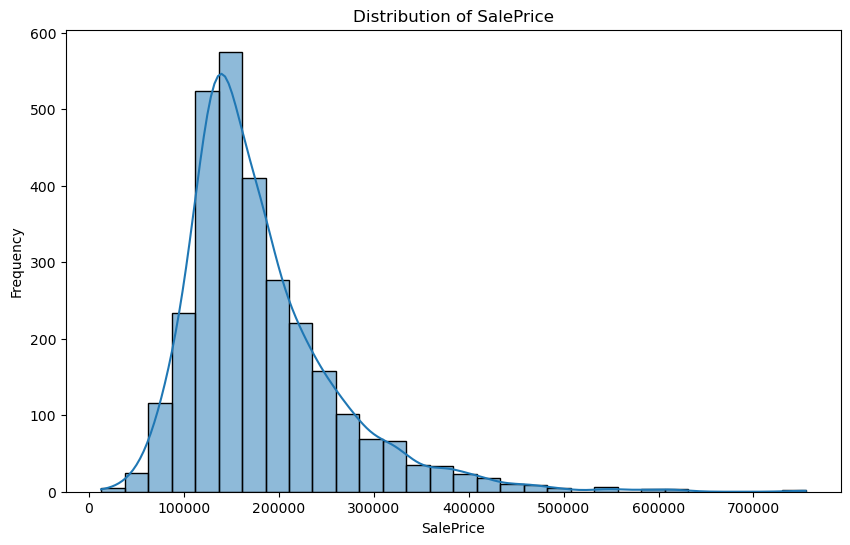

In [12]:
univariateAnalyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariateAnalyzer.execute_analysis(dataframe, 'SalePrice')

<b>Analyzing a Categorical Feature</b>

s:\LB_Projects\Prediction-model\analysis\analysis_components\univariate_analysis.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


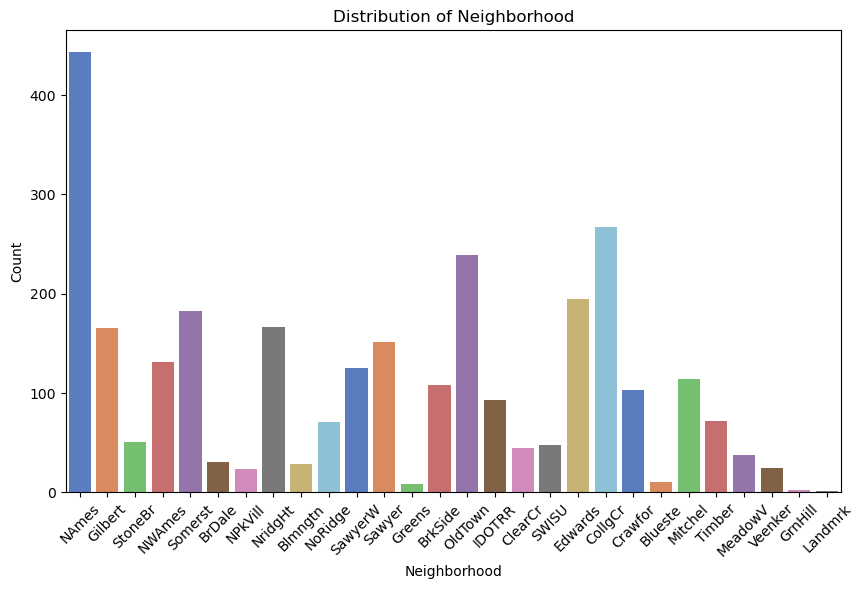

In [14]:
univariateAnalyzer.set_strategy(CategoricalUnivariateAnalysis())
univariateAnalyzer.execute_analysis(dataframe, 'Neighborhood')

### Step 4: Bivariate Analysis

<b>Analyzing the Relationship Between Two Numerical Features</b>

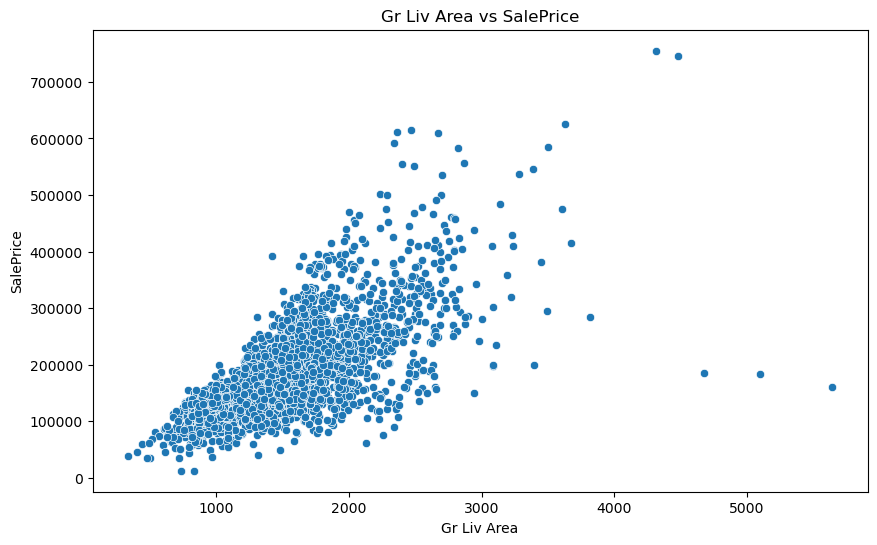

In [17]:
bivariateAnalyzer = BivariateAnalyzer(NumericalAndNumericalAnalysis())
bivariateAnalyzer.execute_analysis(dataframe, 'Gr Liv Area', 'SalePrice')

<b>Analyzing the Relationship Between a Categorical and a Numerical Feature</b>

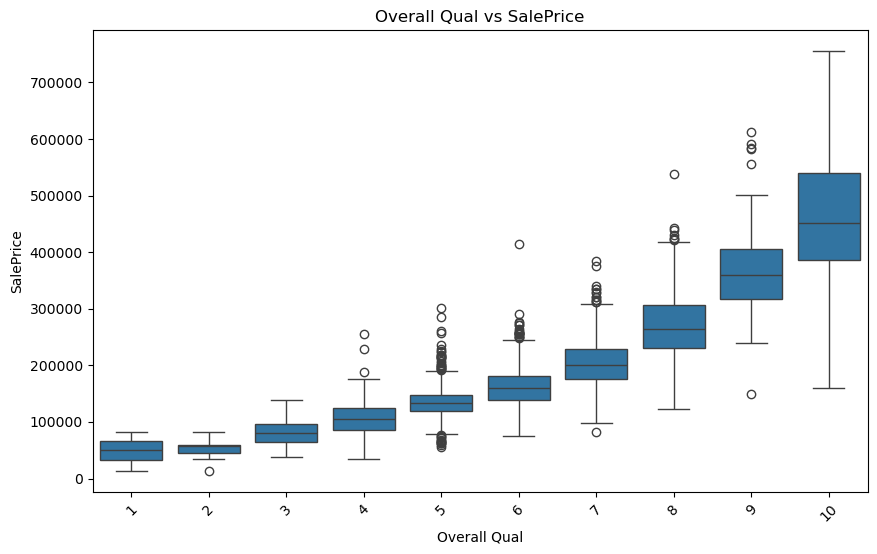

In [18]:
bivariateAnalyzer.set_strategy(CategoricalAndNumericalAnalysis())
bivariateAnalyzer.execute_analysis(dataframe, 'Overall Qual', 'SalePrice')

### **Issues to be Addressed Later**

1. **Handling Missing Data:**
   - **Significant Missing Values**: Columns like `Alley`, `Pool QC`, `Fence`, and `Misc Feature` have a very high percentage of missing data. Decisions need to be made whether to:
     - Drop these columns entirely, as they might not add significant value.
     - Impute missing values with a placeholder (e.g., "None" or "No Pool") to retain them in the analysis.
   - **Moderate Missing Values**: Features related to basements and garages will require careful handling. Missing values could be filled with "No Basement" or "No Garage" for categorical features, and zeros for numerical ones.
   - **Single Missing Values**: These can likely be filled with the mode or mean for categorical and numerical features, respectively.

2. **Outlier Detection and Handling**:
   - Features like `Lot Area`, `Gr Liv Area`, and `SalePrice` show a significant range, indicating potential outliers. These will need to be detected and handled appropriately to avoid skewing model predictions.

3. **Categorical Encoding**:
   - Categorical features like `Neighborhood`, `MS Zoning`, `Bldg Type`, and `Exterior 1st` have many unique values. Decisions need to be made on how to encode these (e.g., one-hot encoding, label encoding, or frequency encoding) based on their relationship with the target variable.